In [1]:
import matplotlib
import numpy as np
from HiveVanilla import Hive
from HiveVanilla import Utilities
import matplotlib.pyplot as plt
from matplotlib import cm 
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animasi

In [2]:
def vis(anim):
    plt.close(anim._fig)
    return anim.to_html5_video()

animasi.Animation._repr_html_ = vis

In [3]:
def evaluasi(vektor):
    vektor = np.array(vektor)
    return 10 * vektor.size + sum(vektor*vektor - 10 * np.cos(2 * np.pi * vektor))

In [4]:
x=np.linspace(-5.12,5.12,50)
y=np.linspace(-5.12,5.12,50)
xv, yv = np.meshgrid(x, y, sparse=False, indexing='xy')
Z = (xv**2 - 10 * np.cos(2 * np.pi * xv)) + (yv**2 - 10 * np.cos(2 * np.pi * yv)) + 20

fig = plt.figure(figsize=(12,10))
ax = fig.gca(projection='3d')
ax.plot_surface(xv, yv, Z, cmap=cm.viridis)
ax.view_init(-8, 30)
ax.axis('on')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Benchmark Rastrigin')


def animate(i):
    ax.view_init(-8, 30 + 4*i)
    return []

animasi.FuncAnimation(fig, animate, frames=40, interval=200, blit=True)

In [5]:
print(matplotlib.animation.writers.list())

['ffmpeg_file', 'ffmpeg', 'html']


Text(0,0.5,'y')

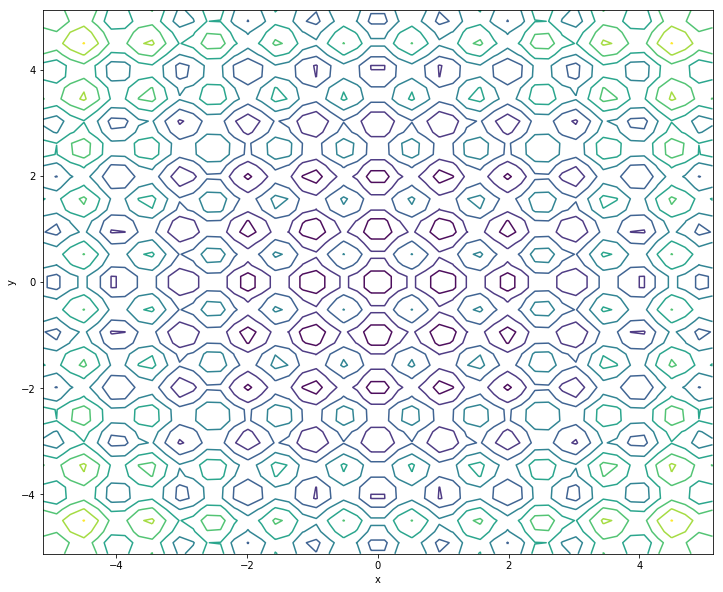

In [6]:
fig,ax = plt.subplots(figsize=(12,10))
ax.contour(xv,yv,Z,cmap=cm.viridis,alpha=.95)
plt.xlabel('x')
plt.ylabel('y')

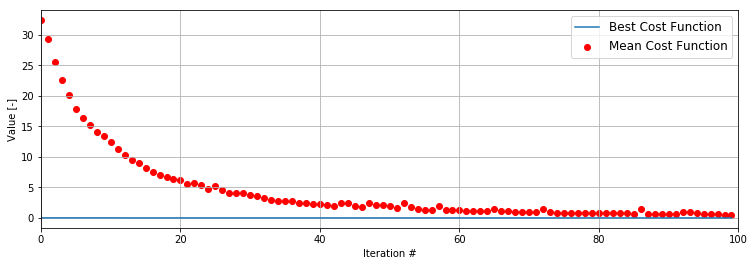

Nilai Fitness: 5.435651928564766e-13


In [7]:
def run():

    # membuat model
    ndim = int(2)
    model = Hive.BeeHive(lower = [-5.12]*ndim  ,
                         upper = [ 5.12]*ndim  ,
                         fun       = evaluasi ,
                         numb_bees =  70       ,
                         max_itrs  =  100       ,)

    # menjalankan model
    cost = model.run()

    # ploting convergence
    Utilities.ConvergencePlot(cost)

    # print solusi terbaik
    print("Nilai Fitness: {0}".format(model.best))
    
    return model

sol=run()
rec=np.array(sol.record)
vals=sol.nectars
bests=sol.bests
n=len(vals[0])

In [11]:
rgba_colors = np.zeros((n,4))
particles=np.zeros(n,dtype=[("position", float , 2)])
rgba_colors[:, 3] = np.exp(-np.array(vals[0])*20)
particles["position"]=rec[0,:,:]
bestPart=bests[0]

fig,ax = plt.subplots(figsize=(12,10))
ax.contour(xv,yv,Z,cmap=cm.viridis,alpha=.75)
scatter=ax.scatter(particles["position"][:,0], particles["position"][:,1],c=rgba_colors,s=200)
scatterBest=ax.scatter(bestPart[0],bestPart[1],color='red',s=200)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Sumber lokasi selama pencarian')

def update(frame_number):

    particles["position"] = rec[frame_number,:,:]
    bestPart=bests[frame_number]
    
    rgba_colors[:, 3] = np.exp(-np.array(vals[frame_number])*20)
    scatter.set_offsets(particles["position"])
    scatterBest.set_offsets(bestPart)
    return scatter, 

animasi.FuncAnimation(fig, update, interval=150, frames=100)

In [12]:
from Hive import Utilities
from Hive import Hive
import csv

In [13]:
f = open('datasahara.csv','r')
data = np.array(list(csv.reader(f, delimiter=' ',quoting=csv.QUOTE_NONNUMERIC)))
data[:,0]=data[:,0]-1
cities=data
nc=len(cities[:,0])
f.close()

Text(0.5,1,'Illustrasi sahara')

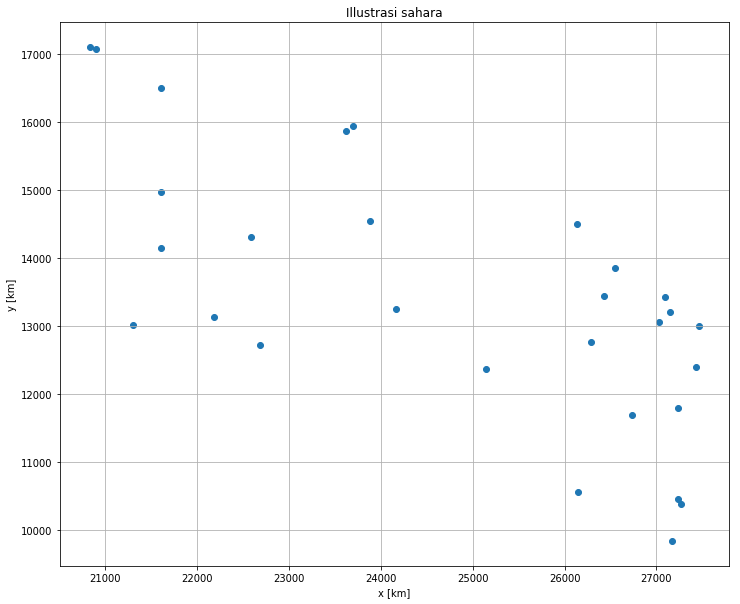

In [14]:
fig = plt.figure(figsize=(12,10))
plt.scatter(cities[:,1],cities[:,2])
plt.xlabel('x [km]')
plt.ylabel('y [km]')
plt.grid()
plt.title('Illustrasi sahara')

In [15]:
def evaluator(path,cities=cities):
  j = 0.0  # jarak total antar kota 
  for i in range(len(path)-1):
      j+=((cities[path[i+1],1]-cities[path[i],1])**2+(cities[path[i+1],2]-cities[path[i],2])**2)**0.5
  
  j+=((cities[path[0],1]-cities[path[-1],1])**2+(cities[path[0],2]-cities[path[-1],2])**2)**0.5

#  minDist = 27603
  return j

Nilai Fitness: 7714.0


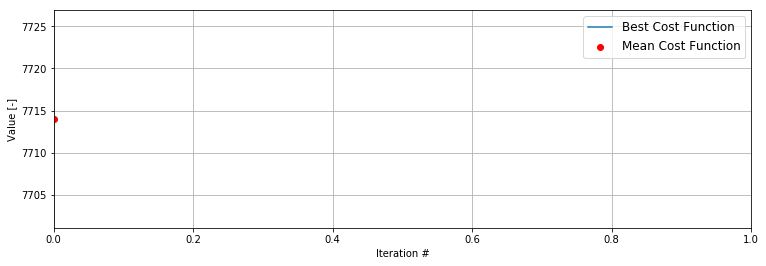

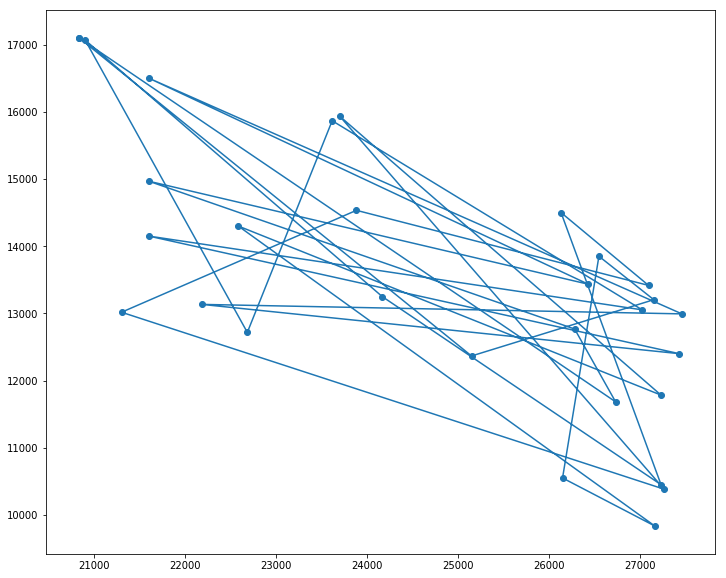

In [16]:
def run():

    # membuat model
    ndim = int(nc)
    model = Hive.BeeHive(lower     = [0] *ndim ,
                         upper     = [nc]*ndim ,
                         fun       = evaluasi ,
                         numb_bees =  200       ,
                         max_itrs  =  500       ,
                         verbose = False,
                         bestDist=27603)

    # menjalankan model
    cost = model.run()

    # ploting convergence
    Utilities.ConvergencePlot(cost)

    # print solusi terbaik
    print("Nilai Fitness: {0}".format(model.best))
    
    return model

model=run()
rec=np.array(model.record)
bestPath=model.solution
x=[]
y=[]

for p in bestPath : 
    x.append(cities[p,1])
    y.append(cities[p,2])

x.append(cities[bestPath[0],1])
y.append(cities[bestPath[0],2])

fig1=plt.figure(figsize=(12,10))
plt.plot(x,y)
plt.scatter(x,y)

In [17]:
fig = plt.figure(figsize=(12, 10))
ax=fig.gca()
xbest=[]
ybest=[]

for i in range(len(rec[:,0])):
    xep=[]
    yep=[]
    for p in rec[i,:] :
        xep.append(cities[p,1])
        yep.append(cities[p,2])
    xep.append(cities[rec[i,0],1])
    yep.append(cities[rec[i,0],2])
    xbest.append(xep)
    ybest.append(yep)

line,=ax.plot(xbest[0],ybest[0])
scatter=ax.scatter(xbest[0],ybest[0])

def update(frame_number):

    line.set_data(xbest[frame_number],ybest[frame_number])
    return line,


animasi.FuncAnimation(fig, update, interval=1000, frames=len(rec[:,0]),blit=False)